<a href="https://colab.research.google.com/github/GyanendraChaubey/Fraud-Detection/blob/main/Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import necessary libabries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data=pd.read_csv('/content/drive/MyDrive/Fraud.csv')

In [6]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [14]:
data=data.drop(['nameOrig','nameDest'],axis=1)

In [15]:
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [16]:
data.isnull().sum()

step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [17]:
data.shape

(6362620, 9)

In [18]:
data.drop_duplicates(keep='first',inplace=True)

In [19]:
data.shape

(6362077, 9)

In [20]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


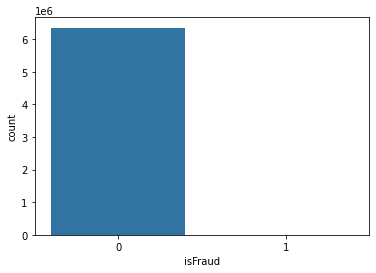

In [21]:
sns.countplot(data['isFraud'])

In [22]:
data['isFraud'].value_counts()

0    6353880
1       8197
Name: isFraud, dtype: int64

In [24]:
data=pd.get_dummies(data,drop_first=True)

In [25]:
data.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
step,1.000000,0.022298,-0.010080,-0.010304,0.027661,0.025871,0.031464,0.003278,-0.012941,0.002867,0.004960,0.006921
amount,0.022298,1.000000,-0.002892,-0.007859,0.294236,0.459355,0.075720,0.012299,-0.004447,-0.023385,-0.197462,0.366017
oldbalanceOrg,-0.010080,-0.002892,1.000000,0.998817,0.066238,0.042004,0.009957,0.003835,-0.200935,-0.021452,-0.189466,-0.081600
newbalanceOrig,-0.010304,-0.007859,0.998817,1.000000,0.067804,0.041832,-0.008137,0.003776,-0.211000,-0.021874,-0.193898,-0.087363
oldbalanceDest,0.027661,0.294236,0.066238,0.067804,1.000000,0.976577,-0.005869,-0.000514,0.086012,0.009345,-0.231438,0.130469
newbalanceDest,0.025871,0.459355,0.042004,0.041832,0.976577,1.000000,0.000380,-0.000529,0.093452,0.006345,-0.238295,0.191697
isFraud,0.031464,0.075720,0.009957,-0.008137,-0.005869,0.000380,1.000000,0.044152,0.011170,-0.002908,-0.025670,0.053942
isFlaggedFraud,0.003278,0.012299,0.003835,0.003776,-0.000514,-0.000529,0.044152,1.000000,-0.001168,-0.000128,-0.001133,0.005245
type_CASH_OUT,-0.012941,-0.004447,-0.200935,-0.211000,0.086012,0.093452,0.011170,-0.001168,1.000000,-0.059632,-0.526391,-0.222696
type_DEBIT,0.002867,-0.023385,-0.021452,-0.021874,0.009345,0.006345,-0.002908,-0.000128,-0.059632,1.000000,-0.057864,-0.024480


In [26]:
y=data['isFraud']
x=data.drop(columns='isFraud')

In [28]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
x, y = rus.fit_resample(x, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [29]:
y.shape

(16394,)

In [30]:
x.shape

(16394, 11)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


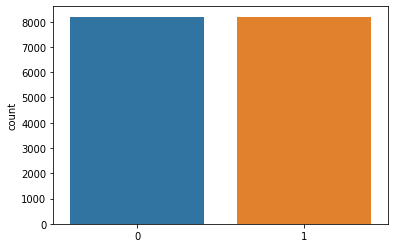

In [31]:
sns.countplot(y)

In [32]:
#Spliting dataset into Train and Test set 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 0)

In [33]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
clf=LogisticRegression()
clf.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
#Checking the accuracy of model
from sklearn.metrics import accuracy_score
y_pred=clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(" Testing Accuracy: %.2f%%" % (accuracy * 100.0))

 Testing Accuracy: 92.64%


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


Text(0.5, 1.0, 'LogisticRegressionClassifier')

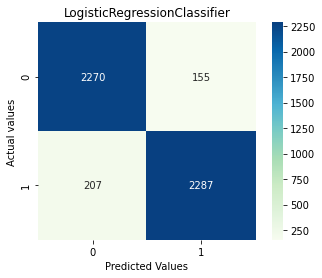

In [38]:
#confusion matrix
from sklearn.metrics import confusion_matrix
con = confusion_matrix(y_test,y_pred)
import seaborn as sns
import matplotlib.pyplot as plt
axes = sns.heatmap(con, square=True,annot=True,fmt='d',cbar = True, cmap = plt.cm.GnBu)
ax = plt.axes()
plt.xlabel('Predicted Values')
plt.ylabel('Actual values')
ax.set_title('LogisticRegressionClassifier')

In [39]:
from sklearn.metrics import classification_report
print('LogisticRegressionClassifier')
print(classification_report(y_test, y_pred))

LogisticRegressionClassifier
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      2425
           1       0.94      0.92      0.93      2494

    accuracy                           0.93      4919
   macro avg       0.93      0.93      0.93      4919
weighted avg       0.93      0.93      0.93      4919

